# APLICACIONES EN CIENCIAS DE COMPUTACION

## Laboratorio 6:  Búsqueda Local (Hill climbing y Simulated annealing) 
Indicaciones generales:

*   Duración: 120 minutos (2 horas).
*   Las respuestas deben contar con un buen fundamento teórico.
*   Cualquier indicio de plagio resultará en la anulación de la prueba.
*   Debe presentar sus respuestas en base a los resultados de ejecución en los casos que se solicite.
*   No se calificarán aquellas respuestas que no presenten un resultado de ejecución o que no concuerden con este.
*   Subir el cuadernillo con el nombre Lab5_código.ipynb, donde código es su código PUCP de 8 dígitos.
*   Se tomará en cuenta en la calificación el uso de comentarios relevantes.



La tarea de este laboratorio consiste en comparar métodos de busqueda local para la resolución de la N-Reinas.<br>Al final de este notebook se encuentran las preguntas que serán evaluadas en este laboratorio. 

**Usted deberá completar el código en las secciones indicadas con "MODIFICAR" y "COMPLETAR"**

Ejemplo de representacion de estado (tablero nqueens):

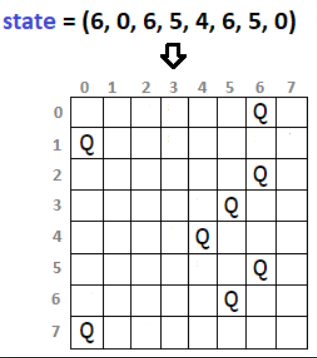

In [1]:
import numpy as np
from collections import defaultdict
from collections import Counter
from random import randrange
import random
from time import time
from random import shuffle, random, sample, randint, choice, uniform
from copy import deepcopy
import math
from math import exp
import sys

### Clase <b>SearchProblem</b>

Esta es una clase abstracta para definir problemas de busqueda. Se debe hacer subclases que implementen los metodos de las acciones, resultados, test de objetivo y el costo de camino. Entonces se puede instanciar las subclases y resolverlos con varias funciones de busqueda.

In [2]:
# ESTA CELDA NO NECESITA SER MODIFICADA  
class SearchProblem:
    def __init__(self, initial=None):
        """Initialize a search problem with a initial state"""
        pass

    def initial(self):
        """Return default initial state of the search problem"""
        pass

    def value(self, state):
        """Return the value of the state. This is the objective function to be optimized"""
        pass

    def neighborhood(self, state):
        """Return the neighboring states of the given state"""
        pass

    def random_neighbor(self, state):
        """Return a random neighbor of the neighborhood of the state (used in simulated annealing)"""
        return choice(self.neighborhood(state))



### Clase <b>NQueensSearch</b>

La clase NQueenSearch implementa concretamente el problema del  tablero de las NQueens. Esta se representa mediante una tupla, en la cual se indica la posición de cada reina Q. Además, incluye el metodo value() para conocer la cantidad de pares de reinas atacadas mutuamente.

In [3]:
# ESTA CELDA NO NECESITA SER MODIFICADA
class NQueensSearch(SearchProblem):
    '''
    State: (QueenCoords)
    '''
    def __init__(self, filename,N=8):
        self.N = N
        self.file = filename

    def initial(self):
        """ Lee el archivo para retornar una tupla con las posiciones de cada Reinas del tablero """
        fd=open(self.file,"r+")
        puzzle=eval(fd.readline())
        board=[]
        for i in puzzle:
            board.append(i)
        return tuple(board)
    
    def value(self, state):
        """ Retorna número de pares de Queens que se atacan mutuamente. Se recorre State: (QueenCoords) 
            para agregar el ataque de cada reina, tanto en sus diagonales como en su misma columna. Luego, 
            se recorre cada collection creado para incrementar el número de pares de reinas atacadas (clashes)"""
        columnQ, diag1Q, diag2Q = [Counter() for i in range(3)]
        #En este caso state = (6,0,6,5,4,6,5,0) 
        for row, col in enumerate(state):
            columnQ[col] += 1       
            diag1Q[row - col] += 1  
            diag2Q[row + col] += 1
        clashes = 0
        for cnt in [columnQ, diag1Q, diag2Q]:
            for key in cnt:
                clashes += cnt[key] * (cnt[key] - 1) // 2
        return clashes

    def neighborhood(self, state):
        """ Crea nuevos tableros vecinos, diferentes al original """
        neighborhood = []
        for row in range(self.N):  # por cada fila
            for col in range(self.N):  # por cada columna
                # genera tablero vecino moviendo reyna de fila row a la columna col (siempre que no exita reyna en (row,col))    
                if col != state[row]: 
                    neighbor = list(state)
                    neighbor[row] = col
                    neighborhood.append(tuple(neighbor))
        return neighborhood

    def random_neighbor(self, state):
        """ Genera un tablero vecino de manera aleatoria, a partir del tablero original pasado (state)"""
        row = randrange(self.N)  # escoge una fila aleatoriamente
        col = choice( [i for i in range(self.N) if i!=state[row]] ) # escoge una columna aleatoria diferente de donde esta la reyna en esa fila
        neighbor = list(state)
        neighbor[row] = col
        return tuple(neighbor)

### Funciones utilitarias para manejar el tablero NQueens</b>
Estas son funciones utilitarias para mostrar el tablero 

In [4]:
# ESTA CELDA NO NECESITA SER MODIFICADA
n=8
def make_board(result):
    board = []
    espacio =['_']*(n+1)
    espacio[0]=' '
    board.append(str().join(espacio))
    for col in result:
        line = ['*'] * (n+2)
        line[0]='|'
        line[col+1] = 'Q'
        line[n+1]='|'
        board.append(str().join(line))
    board.append(str().join(espacio))
    return board

def printBoard(board):
    charlist = list(map(list, board))
    for line in charlist:
        print(" ".join(line))
def ShowBoard(current):
    """ Muestra la distribución de Queens(Q) en el tablero.   """
    board = make_board(current)
    printBoard(board)

## <b>Algoritmos de Búsqueda Local</b> 

### <b>Hill-climbing </b> 

Implementación del algoritmo para la resolución de NQueenSearchs. Los argumentos que recibe son:

-  **problem**: una instancia del problema a resolver. Por ejemplo un objeto de la clase NQueensSearch.
- **maxiter**:  numero maximo de iteraciones

In [5]:
################################## MODIFICAR ###################################
# HACER LAS MODIFICACIONES NECESARIAS PARA QUE ENCUENTRE TABLERO DE MINIMO SCORE

def hill_climbing(problem, maxIter):   
    """ Hill climbing solver. 
           problem:  una instancia del problema a resolver. Por ejemplo un objeto de la clase NQueensSearch.
           maxIter: The maximum number of iterations
    """
    count=0  # contador de iteraciones desde que se encuentra el 1er tablero solucion 
    current = problem.initial()  # lee el archivo del tablero inicial
    current_score = problem.value(current) # evalua tablero inicial
    
    # muestra tablero inicial
    print('Hill Climbing intentará resolver el siguiente tablero NQueens:')
    ShowBoard(current)  
    print()
        
    start_time = time()  # inicia el contador de tiempo
    t = 0
    while (t < maxIter):
        if (t % 100 == 0): 
            print('Iteration {},\tCurrent score  = {}'.format(t, problem.value(current)))
            
        neighborhood = problem.neighborhood(current)
        if not neighborhood:
            break
            
        neighborhood_scores = []
        for i in range(len(neighborhood)): # evalua cada tablero vecino
            neighborhood_scores.append(problem.value(neighborhood[i]) )
        index_best_neighbor = np.argmin(neighborhood_scores)  # obtiene el indice del mejor tablero
        
       
        if neighborhood_scores[index_best_neighbor] < current_score:  # si el mejor vecino es mejor que el tablero current
            current_score = neighborhood_scores[index_best_neighbor]
            current = deepcopy(neighborhood[index_best_neighbor])
        
        if problem.value(current) == 0:  # si es tablero solucion
            count += 1  # aumenta contador de tableros solucion encontrados
        
        t += 1
    end_time = time()  # stop el contador de tiempo
    print('\nN° de tableros solución: %2d en %d iteraciones \nRunning time: %f'%(count,maxIter , end_time-start_time))
    print('Mejor tablero solución hallado con score {}'.format(problem.value(current)))
    ShowBoard(current)  # muestra el tablero final


### <b>Simulating Annealing</b> 
Implementación del algoritmo para la resolución de NQueenSearchs. Los argumentos que recibe son:

-  **problem**: una instancia del problema a resolver. Por ejemplo un objeto de la clase NQueensSearch.
- **T0**: temperatira inicial
- **DR**: Tasa de decaimiento
- **maxiter**:  numero maximo de iteraciones

In [6]:
################################## MODIFICAR ###################################
# HACER LAS MODIFICACIONES NECESARIAS PARA QUE ENCUENTRE TABLERO DE MINIMO SCORE

def simulated_annealing(problem, T0, DR, maxIter):
    """ Simulating annealing solver. 
           problem:  una instancia del problema a resolver. Por ejemplo un objeto de la clase NQueensSearch.
           T0: Initial temperature
           DR: The decay rate of the schedule function: Ti = T0*(DR)^i (Ti is the temperature at iteration i). 
               For efficiecy the schedule function is implemented as: Ti = T(i-1)*DR
      maxIter: The maximum number of iterations
    """
    count=0   # contador de iteraciones desde que se encuentra el 1er tablero solucion 
    current = problem.initial()  # lee el archivo del tablero inicial
    current_score = problem.value(current)*-1    # evalua tablero inicial
   
    # muestra tablero inicial    
    print('Simulated Annealing intentará resolver el siguiente tablero NQueens: ')
    ShowBoard(current)  # muestra tablero inicial
    print()    
    
    start_time = time()  # inicia el contador de tiempo
    best_score = current_score
    T=T0  # inicia temperatura en temperatura inicial
    t = 0
    while (t < maxIter):
        if (t % 10000 == 0): 
            print('Iteration {},\tTemperaure = {},\tBest score = {},\tCurrent score = {}'.format(t, T,best_score*-1, current_score*-1))

        neighbor      = problem.random_neighbor(current)
        neighborScore = problem.value(neighbor)*-1  # evalua tablero vecino
        delta = float(neighborScore - current_score)  # diferencia entre el score del tablero vecino con respecto al actual
            
        if (delta > 0):   # si el tablero vecino generado es mejor que el actual, se acepta
            current = neighbor
            current_score = neighborScore 
        elif ( random() < exp((delta/T)) ):  # si el tablero generado es peor, se acepta con probability  exp((delta/T))
            current = neighbor
            current_score = neighborScore 
            
        if (current_score > best_score):  # si el tablero actual es mejor que el mejor tablero encontado hasta ahora
            best_board = deepcopy(current)
            best_score = current_score
                
        if current_score == 0:  # si es tablero solucion   
            best_board = current
            best_score = current_score
            if count==0: 
                best_iteracion = t   # iteracion donde se encontro el 1er tablero solucion
            count += 1  # aumenta contador de tableros solucion encontrados
            
        T = T*DR   # aplica decaimiento de temperatura
        t += 1
    end_time = time()  # stop del contador de tiempo
    
    if best_score == 0:
        print ("\nSA encontro tablero solucion en iteracion = {} de {} iteraciones".format(best_iteracion, t))
    else:
        print("\nSA no encontró tablero solucion!. Este es el mejor tablero encontrado con score={}:".format(best_score*-1))
    
    print("N° de tableros solución: %2d en %d iteraciones \nRunning time: %f"%(count, t , end_time-start_time))
   
    ShowBoard(best_board)  # muestra el mejor tablero

## <b> Experimentación con los algoritmos de Búsqueda</b> 

In [7]:
# ESTA CELDA NO NECESITA SER MODIFICADA
""" Carga un tablero de archivo en disco e instancia el problema de busqueda  """
problem = NQueensSearch("queens.txt")
print("8-Queens Original")
ShowBoard(problem.initial())

8-Queens Original
  _ _ _ _ _ _ _ _
| * * * * * * Q * |
| Q * * * * * * * |
| * * * * * * Q * |
| * * * * * Q * * |
| * * * * Q * * * |
| * * * * * * Q * |
| * * * * * Q * * |
| Q * * * * * * * |
  _ _ _ _ _ _ _ _


### Hill Climbing

Llama a Hill Climbing para resolver el tablero 'queens.txt' con numero de iteraciones maxIter=1000

In [8]:
###### COMPLETAR PRUEBA #########
hill_climbing(problem, 1000)

Hill Climbing intentará resolver el siguiente tablero NQueens:
  _ _ _ _ _ _ _ _
| * * * * * * Q * |
| Q * * * * * * * |
| * * * * * * Q * |
| * * * * * Q * * |
| * * * * Q * * * |
| * * * * * * Q * |
| * * * * * Q * * |
| Q * * * * * * * |
  _ _ _ _ _ _ _ _

Iteration 0,	Current score  = 10
Iteration 100,	Current score  = 2
Iteration 200,	Current score  = 2
Iteration 300,	Current score  = 2
Iteration 400,	Current score  = 2
Iteration 500,	Current score  = 2
Iteration 600,	Current score  = 2
Iteration 700,	Current score  = 2
Iteration 800,	Current score  = 2
Iteration 900,	Current score  = 2

N° de tableros solución:  0 en 1000 iteraciones 
Running time: 0.537345
Mejor tablero solución hallado con score 2
  _ _ _ _ _ _ _ _
| * * Q * * * * * |
| * * * * Q * * * |
| * * * * * * * Q |
| * Q * * * * * * |
| * * * * Q * * * |
| * * * * * * Q * |
| * * * * * Q * * |
| Q * * * * * * * |
  _ _ _ _ _ _ _ _


### Simulated Annealing

In [9]:
###### COMPLETAR PRUEBA #########
simulated_annealing(problem,0.5, .99999, 100000)

Simulated Annealing intentará resolver el siguiente tablero NQueens: 
  _ _ _ _ _ _ _ _
| * * * * * * Q * |
| Q * * * * * * * |
| * * * * * * Q * |
| * * * * * Q * * |
| * * * * Q * * * |
| * * * * * * Q * |
| * * * * * Q * * |
| Q * * * * * * * |
  _ _ _ _ _ _ _ _

Iteration 0,	Temperaure = 0.5,	Best score = 10,	Current score = 10
Iteration 10000,	Temperaure = 0.45241848280737684,	Best score = 0,	Current score = 1
Iteration 20000,	Temperaure = 0.4093649671714617,	Best score = 0,	Current score = 2
Iteration 30000,	Temperaure = 0.3704085547244124,	Best score = 0,	Current score = 2
Iteration 40000,	Temperaure = 0.33515935269458563,	Best score = 0,	Current score = 2
Iteration 50000,	Temperaure = 0.3032645716895745,	Best score = 0,	Current score = 1
Iteration 60000,	Temperaure = 0.2744049948260552,	Best score = 0,	Current score = 0
Iteration 70000,	Temperaure = 0.24829178286794154,	Best score = 0,	Current score = 0
Iteration 80000,	Temperaure = 0.22466358339730758,	Best score = 0,	Current 

# Preguntas:
**1.** Se presenta el tablero: 'queens.txt' de las 8-Queens con función de costo: 
    
        h = número de pares de reinas que se atacan mutuamente    

Además, se implementan los algoritmos Simulating Annealing (SA) y Hill Climbing (HC) con los siguientes parámetros (ellos garantizan una misma cantidad de tableros evaluados como máximo):

        HC: maxIter=1000
        SA: T0=0.5, DR=.99999, maxIter=100000 
        
En el presente laboratorio, se proponen los algoritmos de búsqueda local, los cuales **maximizan** la función. Se solicita modificar el código en ambos algoritmos, con la finalidad de **minimizar** la función de costo (h) **(4 pts)**
                 

**2.** Después de haber completado el código, ¿el algoritmo Hill Climbing presenta soluciones óptimas? ¿Cuáles son las limitaciones que puede presentar este algoritmo de búsqueda local, según los resultados? **(4 pts)**


**3.** En cuanto a las soluciones encontradas por Simulated Annealing, ¿este algoritmo presenta soluciones óptimas? ¿Cómo se pueden interpretar y relacionar los resultados con su teoría y propiedades? Por otro lado, ¿cómo controlamos el grado de exploración de un algoritmo Simulated Annealing? **(4 pts)**


**4.** Usando fundamento teórico, ¿cuáles son las principales ventajas de Simulated Annealing sobre Hill Climbing? Además, relacione su respuesta con los resultados obtenidos en las pruebas. **(5 pts)**



**5.** ¿Qué estrategias de mejora se pueden aplicar en Hill Climbing, en el caso de NQueens? **(3 pts)**









2 - 

El algoritmo Hill climbing no presenta soluciones óptimas, ya que no se encontró el resultado deseado que es que 0 reinas se ataquen entre sí. Esto se debe a la limitación que tiene el algoritmo sobre los máximos locales, pues, debido a la naturaleza del algoritmo de solo tomar los valores de los vecinos más altos, se quedan con un valor que sea máximo local, pese a que este NO es el máximo global de todo el conjunto de estados.
En otras palabras, Hill climbing tiene la limitación de que si encuentra un máximo local (o minimo local en este caso, al buscar el menor valor de una función costo), se atascará en ese resultado, como se ve en el resultado del problema de las N reinas, donde se atasco con la solucion de 2.

3 -

El algoritmo sí encontró soluciones óptimas, pues llego al valor de la función de costo deseado, el cual es 0. Lo que hace el algoritmo de Simulating Annealing, es tomar los valores más óptimos de los estados vecinos, pero que exista una probabilidad de que se pueda tomar valores menos óptimos también. Esta probabilidad depende de la "temperatura" y el valor por el cual se va disminuyendo. Mientras más baja sea la temperatura, es decir, mientras más iteraciones se hayan realizado, habrá menor posibilidad de tomar valores no óptimos de los vecinos.

Para controlar la exploración de estados, la temperatura debe disminuir más lento, de modo que la posibilidad de explorar más estados no óptimos se mantenga durante más iteraciones. Esto se logra alterando el valor de DR del algoritmo. Mientrás más rápido se baje la temperatura, es decir, mientras más bajo sea el valor de DR, se realizará una exploración menos amplia.

4 -

La principal ventaja que tiene el Simulated Annealing sobre el Hill Climbing es que el primero combina el segundo con caminos aleatorios, lo cual le da una chance de poder continuar con la búsqueda de un mínimo global o máximo global cuando el algoritmo se encuentre con un máximo o mínimo local, pues tiene la posibilidad de tomar soluciones menos óptimas para tomar un camino distinto, aunque esta posibilidad se reduce mientras más iteraciones se lleven a cabo.

En el problema, puede verse como el Hill Climbing se quedo atascado en un sólo resultado, debido a que se topo con un mínimo local. Por otro lado, el Simulated Annealing, tiene la posibilidad de conseguir una solución menos óptima que las que ya ha hallado, como cuando aumenta el valor actual de la función de costo, pero esto es para hallar otros estados que puedan llevar a la solución óptima. 
Cabe recalcar, sin embargo, que puede existir la posibilidad de no hallar la solución óptima en el caso que el algoritmo se encuentre en un mínimo local, pero las iteraciones ya esten bastante avanzadas, de modo que habrá menor posibilidad de salir de dicho mínimo local.


5 -

Una manera en la que se podría mejorar el Hill Climbing respecto a los máximos y mínimos locales es mediante el Stochastic Hill Climbing, el cual consiste en que ya no hay total certeza de que se tomen los vecinos con valores más óptimos, sino que los vecinos pueden ser elegidos en función a lo óptimo que sean, haciendo que los estados vecinos más óptimos tengan mayor probabilidad de ser elegidos y los óptimos menor, pero no posibilidad nula, de modo que existe posibilidad de escapar de un valor óptimo local.
